In [68]:
import pandas as pd
df=pd.read_csv('data/churn.csv')
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [69]:
%matplotlib inline

In [70]:
#df['last_trip_date']=pd.to_datetime(df['last_trip_date'])
churn_date=pd.to_datetime(({'year': [2014],'month': [6],'day': [1]}))


In [ ]:
import numpy as np
df['churn'] = df['last_trip_date'].apply(lambda x: x >= churn_date)
df['churn'] = np.where(df['churn'] ==True, '0', '1')

In [74]:
df.isnull().values.any()

True

In [75]:
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
churn                        0
dtype: int64

In [76]:
df.phone = df.phone.fillna('no_phone')

In [77]:
#Convert columns with categorical data into categorical type
df.city = df.city.astype("category")
df.phone = df.phone.astype('category')

In [78]:
#checking the above conversion
pd.crosstab(df.phone, df.city)

city,Astapor,King's Landing,Winterfell
phone,,,
Android,5244,2498,7280
iPhone,11169,7568,15845
no_phone,121,64,211


In [79]:
#performing check on dates-as a part of EDA
np.any(df.last_trip_date < df.signup_date)#as it should be last_trip_date is greater than signup_date

False

In [80]:
df.signup_date.describe()

count          50000
unique            31
top       2014-01-18
freq            2948
Name: signup_date, dtype: object

In [81]:
#the following format has cleared the assertion error that I was getting pd.to_datetime while trying to get more cleaner
#date version of last_trip_date and signup_date
df.last_trip_date = pd.to_datetime(df.last_trip_date, format="%Y/%m/%d")
df.signup_date = pd.to_datetime(df.signup_date, format="%Y/%m/%d")

In [82]:
df['last_trip_date'].head()

0   2014-06-17
1   2014-05-05
2   2014-01-07
3   2014-06-29
4   2014-03-15
Name: last_trip_date, dtype: datetime64[ns]

In [83]:
#trying to figure out monthly details
df['last_year'] = df.last_trip_date.apply(lambda x: x.year)
df['last_month'] = df.last_trip_date.apply(lambda x: x.month)
pd.crosstab(df.last_month, df.last_year)

last_year,2014
last_month,
1,10147
2,4308
3,4568
4,4588
5,7585
6,18256
7,548


In [84]:
#Let's take a look at June to see what is going on day by day
dftmp = df[df.last_month == 6]
dftmp['last_day'] = dftmp.last_trip_date.apply(lambda x: x.day)
dftmp.last_day.value_counts()

/Users/chidam/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


29    2036
28    1679
30    1408
27    1120
22    1024
21     869
26     793
14     665
15     647
20     612
25     603
23     546
7      534
8      527
1      494
19     455
24     440
13     438
18     400
12     351
6      314
16     310
11     297
17     296
5      262
9      262
10     244
4      240
2      208
3      182
Name: last_day, dtype: int64

In [85]:
#some statistics - received error while finding the statistics
#df.groupby([['churn', 'last_month']]).quantile(q=0.5)

In [86]:
#I have done this differently (check in the very beginning few cells of this notebook. but adding a column based on start_date for visualization purpose
start_date = pd.to_datetime('2014-07-01', format='%Y-%m-%d')

In [87]:
import datetime
start_date = start_date - datetime.timedelta(30,0,0)
start_date

Timestamp('2014-06-01 00:00:00')

In [88]:
#going to add a column to identify active customers
df['is_active'] = (start_date < df.last_trip_date)

In [89]:
df.is_active.value_counts(dropna=False)

False    31690
True     18310
Name: is_active, dtype: int64

In [23]:
#visualizing by plotting active users as red and inactive (churn) as blue. it didn't work
# from pandas.plotting import scatter_matrix
# core_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 
#                  'surge_pct', 'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct']
# colors = ['red' if ix else 'blue' for ix in df.is_active]

In [24]:
#scatter plot visualization - interpretation
# The scatter matrix does not show any feature which will clearly separate out active vs. inactive users. Some features do seem to help. Thus, we probably have a highly non-linear relationship and should consider a random forest or gradient boosted decision tree, which are ensemble versions of a decision tree. With a lot of feature engineering, we might be able to get comparable performance from logistic regression. SVM almost certainly will not work because there is no clear separation of postive and negative calsses.
# There seems to be some observations where surge_pct = (+/-) weekday_pct. May merit further investigation or signal a data feed/entry problem.

In [90]:
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                        0
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
churn                        0
last_year                    0
last_month                   0
is_active                    0
dtype: int64

In [91]:
#in order to find how many of avg_rating_of_driver and avg_rating_by_driver are missing i have to check info on df without totaling the sum of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null category
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null category
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
churn                     50000 non-null object
last_year                 50000 non-null int64
last_month                50000 non-null int64
is_active                 50000 non-null bool
dtypes: bool(2), category(2), datetime64[ns](2), float64(6), int64(3), object(1)
memory usage: 4.8+ MB


In [92]:
#two columns: avg_rating_by_driver and avg_rating_of_driver seem to have Nan values
#the non_null values of the two columns are as follows:
# avg_rating_by_driver      49799 
# avg_rating_of_driver      41878

#because a considerable number of values are missing in avg_rating_of_driver focusing on that now to get a percentage of values
#that are missing - approximately 19.5% missing so it's not a good idea to drop those values.
(8122/41878)*100

19.394431443717465

In [93]:
#Would be nice to just do a simple t-test to see if distribution of features is different for rows with/without missing values.
# Calculate the T-test for the means of two independent samples of scores.

# This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values.
# This test assumes that the populations have identical variances by default.
# We can use this test, if we observe two independent samples from the 
# same or different population, e.g. exam scores of boys 
# and girls or of two ethnic groups. 
# The test measures whether the average (expected) value differs significantly across samples.
#If we observe a large p-value, for example larger than 0.05 or 0.1, 
#then we cannot reject the null hypothesis of identical average scores.
# If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.


import scipy.stats
def ttest_by(vals, by):
    vals1 = vals[by]
    vals2 = vals[-by]
    return scipy.stats.ttest_ind(vals1, vals2)



In [94]:
ttest_by(df.avg_dist, pd.isnull(df.avg_rating_of_driver))

Ttest_indResult(statistic=29.754284259108406, pvalue=7.407707064855626e-193)

In [95]:
ttest_by(df.avg_dist, pd.isnull(df.avg_rating_by_driver))

Ttest_indResult(statistic=0.9217960316838936, pvalue=0.35663942563201456)

In [96]:
# Result of t-test:
# We can reject H0: of no difference only for case where values in avg_rating_of_driver are missing. 

#We have a couple options for handling missing data: drop the rows if there are only a few or they are missing at random, 
#impute the missing values, or bin the feature by quantiles (typically deciles) + a bin for missing.

df['b_no_rating_of_driver'] = pd.isnull(df.avg_rating_of_driver)


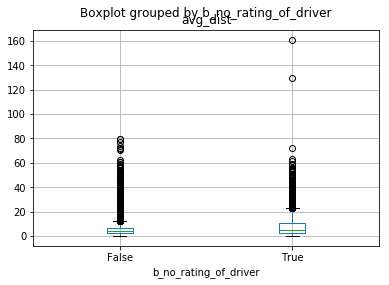

In [97]:
df.boxplot('avg_dist', by='b_no_rating_of_driver')
#in the plot below: True describes the null-values for avg_rating_of_driver and False describes the
#non-null values for avg_rating_of_driver

In [98]:
#So I can remove the rows with null values in the column: avg_rating_by_driver
df2 = df[(pd.notnull(df.avg_rating_by_driver))]

In [99]:
df2.isnull().sum()

avg_dist                     0
avg_rating_by_driver         0
avg_rating_of_driver      8055
avg_surge                    0
city                         0
last_trip_date               0
phone                        0
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
churn                        0
last_year                    0
last_month                   0
is_active                    0
b_no_rating_of_driver        0
dtype: int64

In [100]:
 # Simple check
churn_date=pd.to_datetime(({'year': [2014],'month': [6],'day': [1]}))
import numpy as np
df['churn'] = df['last_trip_date'].apply(lambda x: x >= churn_date)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10d371748>,
      dtype=object)

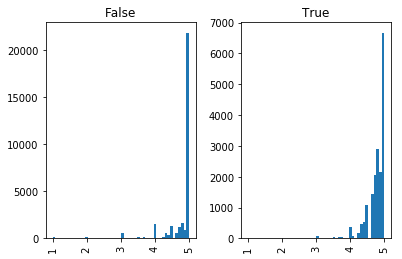

In [104]:
#question to ask: drivers provided 
df.avg_rating_by_driver.hist(bins=50, histtype='bar', by=df.is_active, stacked=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10ad5d278>,
      dtype=object)

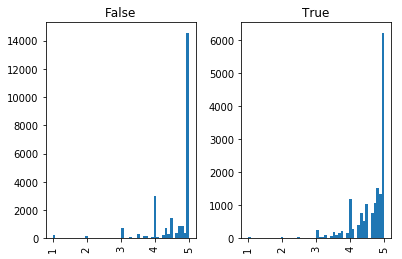

In [105]:
#inactive users are providing high ratings for drivers as it's not very frequent for them to hail a ride
# as can be seen from the pic below the density of 5-star ratings is pretty thin and a lot of traffic can be seen between
# the 4-star and 5-star ratings in the True section. so it can be assumed that ratings are categorized perhaps as 4.2, 4.3, 4.4 ...?


df.avg_rating_of_driver.hist(bins=50, histtype='bar', by=df.is_active, stacked=True)

In [106]:
df['b_rating_5'] = df.avg_rating_of_driver == 5

In [142]:
pd.crosstab(df.b_rating_5, df.is_active, dropna=False, margins=True)

is_active,False,True,All
b_rating_5,,,
False,17134,12095,29229
True,14556,6215,20771
All,31690,18310,50000


In [143]:
#to find out percentage of 5-star ratings given by active customers
(6215/18310)*100


33.94320043691972

In [144]:
#to find out percentage of 5-star ratings given by not active customers
(14556/31690)*100

45.93247081098138

In [145]:
#Some interpretation
#so this means approx only 34% of active customers give 5-star ratings to driver compared to 46% by not active customers
# We need to take a closer look at the rating data because most users rate drivers 5.
# How the app works can affect ratings. E.g., for Uber, if you rate a driver below 4, 
# you must then explain why.
# Consequently, many people don't rate drivers below 4 even if they are horrible.
# Got to be mindful of incentives which can affect human behavior.

# We have two main options:
# Use df3 where we have dropped rows which are missing rating information.
# Quantize features with missing data, but use full data set, df. 
# Add missing bin value for quantized features. Typically, use deciles.
# Because a significant fraction of people only give out a rating of 5 and 
# there are disincentives to give a rating below 4, 
# we choose appropriate cuts below. If data was distributed more smoothly, 
# we would cut by quantile. Note that the way we setup the cuts, the top bin contains only ratings whose average is 5: thus, we do not need the b_rating_5 field.

df['bin_avg_rating_by_driver'] = pd.cut(df.avg_rating_by_driver, bins=[0., 2.99, 3.99, 4.99, 5],right=True)
df['bin_avg_rating_of_driver'] = pd.cut(df.avg_rating_of_driver, bins=[0., 2.99, 3.99, 4.99, 5],right=True) 
                                   

In [146]:


pd.crosstab(df.bin_avg_rating_by_driver, df.b_rating_5)


b_rating_5,False,True
bin_avg_rating_by_driver,,
"(0.0, 2.99]",232,116
"(2.99, 3.99]",753,468
"(3.99, 4.99]",13621,6101
"(4.99, 5.0]",14519,13989


In [147]:
#I feel like the following statistic is pretty useful
pd.crosstab(df.bin_avg_rating_by_driver, df.is_active)

is_active,False,True
bin_avg_rating_by_driver,,
"(0.0, 2.99]",309,39
"(2.99, 3.99]",948,273
"(3.99, 4.99]",8428,11294
"(4.99, 5.0]",21838,6670


In [148]:
pd.crosstab(df.bin_avg_rating_of_driver, df.b_rating_5)

b_rating_5,False,True
bin_avg_rating_of_driver,,
"(0.0, 2.99]",701,0
"(2.99, 3.99]",3111,0
"(3.99, 4.99]",17295,0
"(4.99, 5.0]",0,20771


In [149]:
pd.crosstab(df.bin_avg_rating_of_driver, df.is_active)

is_active,False,True
bin_avg_rating_of_driver,,
"(0.0, 2.99]",522,179
"(2.99, 3.99]",1735,1376
"(3.99, 4.99]",8323,8972
"(4.99, 5.0]",14556,6215


In [150]:
df.bin_avg_rating_by_driver.cat.add_categories('missing', inplace=True)
df.bin_avg_rating_of_driver.cat.add_categories('missing', inplace=True)

In [152]:
df.bin_avg_rating_by_driver.head()

0     (4.99, 5.0]
1     (4.99, 5.0]
2     (4.99, 5.0]
3    (3.99, 4.99]
4    (3.99, 4.99]
Name: bin_avg_rating_by_driver, dtype: category
Categories (5, object): [(0.0, 2.99] < (2.99, 3.99] < (3.99, 4.99] < (4.99, 5.0] < missing]

In [153]:
df.bin_avg_rating_by_driver.fillna('missing', inplace=True)
df.bin_avg_rating_of_driver.fillna('missing', inplace=True)

In [155]:
pd.crosstab(df.bin_avg_rating_by_driver, df.bin_avg_rating_of_driver)

bin_avg_rating_of_driver,"(0.0, 2.99]","(2.99, 3.99]","(3.99, 4.99]","(4.99, 5.0]",missing
bin_avg_rating_by_driver,,,,,
"(0.0, 2.99]",23,25,39,116,145
"(2.99, 3.99]",52,125,319,468,257
"(3.99, 4.99]",236,1757,10721,6101,907
"(4.99, 5.0]",382,1196,6195,13989,6746
missing,8,8,21,97,67


In [156]:
#Now these fields are binned with a level for missing. Converting them to dummy variables.
#pd.get_dummies:Convert categorical variable into dummy/indicator variables
df_dum_by_driver = pd.get_dummies(df.bin_avg_rating_by_driver)

In [157]:
df_dum_by_driver.head()

,"(0.0, 2.99]","(2.99, 3.99]","(3.99, 4.99]","(4.99, 5.0]",missing
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,1,0,0
4,0,0,1,0,0


In [158]:
df_dum_by_driver.apply(lambda x: x.value_counts())

,"(0.0, 2.99]","(2.99, 3.99]","(3.99, 4.99]","(4.99, 5.0]",missing
0,49652,48779,30278,21492,49799
1,348,1221,19722,28508,201


In [159]:
df_dum_by_driver.columns = map(lambda x: 'dummy_by_driver_' + str(x), df_dum_by_driver.columns)

In [161]:
df_dum_of_driver = pd.get_dummies(df.bin_avg_rating_of_driver)
df_dum_of_driver.apply(lambda x: x.value_counts())

,"(0.0, 2.99]","(2.99, 3.99]","(3.99, 4.99]","(4.99, 5.0]",missing
0,49299,46889,32705,29229,41878
1,701,3111,17295,20771,8122


In [162]:
df_dum_of_driver.columns = map(lambda x: 'dummy_of_driver_' + str(x), df_dum_of_driver.columns)

In [163]:
df_dummy_phone = pd.get_dummies(df.phone)

In [164]:
df_dummy_city = pd.get_dummies(df.city)

In [165]:
#Assembling data into complete DataFrame
df_all = pd.concat([df.avg_dist, df_dummy_phone, df_dummy_city, df.ix[:, 
                    ['surge_pct', 'trips_in_first_30_days', 'luxury_car_user', 
                     'weekday_pct', 'is_active']], df_dum_by_driver, df_dum_of_driver], axis=1)

/Users/chidam/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


In [170]:
#Modeling
#As a first step going to build a simple model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import train_test_split

In [197]:
import matplotlib.pyplot as plt
def roc_curve(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list

    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''

    thresholds = np.sort(probabilities)

    tprs = []
    fprs = []

    num_positive_cases = sum(labels)
    num_negative_cases = len(labels) - num_positive_cases

    for threshold in thresholds:
        # With this threshold, give the prediction of each instance
        predicted_positive = probabilities >= threshold
        # Calculate the number of correctly predicted positive cases
        true_positives = np.sum(predicted_positive * labels)
        # Calculate the number of incorrectly predicted positive cases
        false_positives = np.sum(predicted_positive) - true_positives
        # Calculate the True Positive Rate
        tpr = true_positives / float(num_positive_cases)
        # Calculate the False Positive Rate
        fpr = false_positives / float(num_negative_cases)

        fprs.append(fpr)
        tprs.append(tpr)
    
    return tprs, fprs, thresholds.tolist()

def plot_roc(probs, y_true, title, xlabel, ylabel):
    # ROC
    tpr, fpr, thresholds = roc_curve(v_probs, y_test)

    plt.plot(fpr, tpr)

    # 45 degree line
    xx = np.linspace(0, 1.0, 20)
    plt.plot(xx, xx, color='red')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.show()

In [192]:
v_features = df_all.columns
v_features = v_features.tolist()
v_features = v_features[:]
del v_features[v_features.index('is_active')]

In [193]:
X = df_all.loc[:, v_features]
y = df_all.is_active.astype('int')

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

In [180]:
#building a crappy model: Logistic Regression
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [181]:
lr.score(X_test,y_test)

0.7482

In [188]:
v_probs = lr.predict_proba(X_test)[:, 1]
# predict_proba method of logistic regression model returns an array-like with 
# shape = [n_samples, n_classes] and thats why we are using [:, 1] to just get the probabilities of classes

In [189]:
v_probs

array([0.87180932, 0.64166655, 0.22665942, ..., 0.11953268, 0.07969787,
       0.19582046])

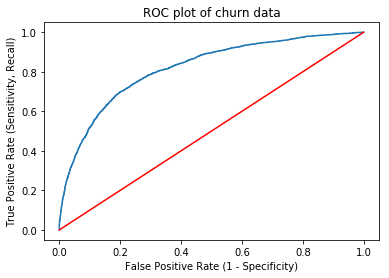

In [198]:
plot_roc(v_probs, y_test, "ROC plot of churn data","False Positive Rate (1 - Specificity)", "True Positive Rate (Sensitivity, Recall)")


In [199]:
import sklearn.metrics as skm
skm.roc_auc_score(y_test, lr.predict(X_test))

0.7468694104315784

In [200]:
pd.crosstab(y_test, lr.predict(X_test))

col_0,0,1
is_active,,
0,4771,1575
1,943,2711


In [201]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_true):
    '''Code stolen brazenly from sklearn example.'''
    cm = confusion_matrix(y_true, model.predict(X_test))

    print(cm)

    # Show confusion matrix in a separate window
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[[4771 1575]
 [ 943 2711]]


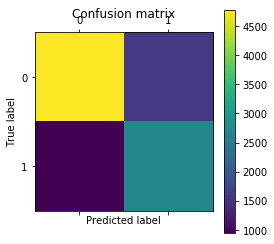

In [202]:
plot_confusion_matrix(lr, X_test, y_test)
#Simple model is not very good 

In [203]:
# A slightly better crappy model: gradient boosting classification trees
# The non-linear nature of the problem makes decision trees appealing. 
# But, it makes sense to use an ensemble model (random forest, gradient boosting) 
#to get the best performance.
from sklearn.ensemble import GradientBoostingClassifier


In [204]:
gbc = GradientBoostingClassifier(n_estimators=500, max_depth=8, subsample=0.5, 
                                 max_features='auto', learning_rate=0.05)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=8,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

In [205]:
gbc.score(X_test,y_test)

0.786

In [206]:
pd.crosstab(y_test, gbc.predict(X_test))

col_0,0,1
is_active,,
0,5454,892
1,1248,2406


In [207]:
skm.roc_auc_score(y_test, gbc.predict(X_test))
#This is not great, but not horrible... but how?

0.7589477513730641

[[5454  892]
 [1248 2406]]


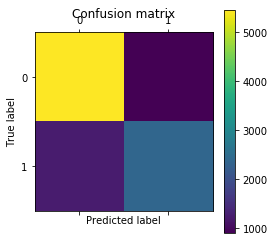

In [208]:
plot_confusion_matrix(gbc, X_test, y_test)
#actually the number of correct predictions has gone down compared to logistic regression

In [210]:
#going to check if Random Forest does any better
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [211]:
rfc.score(X_test, y_test)

0.7527

In [212]:
pd.crosstab(y_test, rfc.predict(X_test))

col_0,0,1
is_active,,
0,5138,1208
1,1265,2389


In [213]:
skm.roc_auc_score(y_test, rfc.predict(X_test))

0.7317239602551012

[[5138 1208]
 [1265 2389]]


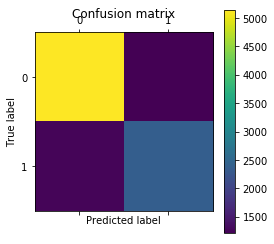

In [214]:
plot_confusion_matrix(rfc, X_test, y_test)
#gradient boosting result seems better than random forest model's

In [215]:
# Refining model:
# Now we try several things:
# Scale data
# Use grid search to find the best tuning of each model
# Compare different classification models
# Explore feature engineering
# Tune with profit curve based on costs of different classification errors

X[['avg_dist', 'surge_pct', 'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct']].describe()


,avg_dist,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,8.849536,2.278200,60.926084
std,5.707357,19.958811,3.792684,37.081503
min,0.000000,0.000000,0.000000,0.000000
25%,2.420000,0.000000,0.000000,33.300000
50%,3.880000,0.000000,1.000000,66.700000
75%,6.940000,8.600000,3.000000,100.000000
max,160.960000,100.000000,125.000000,100.000000


In [216]:
from sklearn.preprocessing import scale
X.avg_dist = scale(X.avg_dist)
X.surge_pct = scale(X.surge_pct)
X.trips_in_first_30_days = scale(X.trips_in_first_30_days.astype('float'))
X.weekday_pct = scale(X.weekday_pct)

In [217]:
X[['avg_dist', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']].describe()

,avg_dist,surge_pct,trips_in_first_30_days,weekday_pct
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,-2.558398e-17,8.276602e-16,-8.546253e-16,1.350848e-15
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.015686e+00,-4.433944e-01,-6.006888e-01,-1.643048e+00
25%,-5.916680e-01,-4.433944e-01,-6.006888e-01,-7.450173e-01
50%,-3.358553e-01,-4.433944e-01,-3.370206e-01,1.557103e-01
75%,2.003002e-01,-1.250267e-02,1.903157e-01,1.053741e+00
max,2.718679e+01,4.566974e+00,3.235783e+01,1.053741e+00


In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

In [237]:
#refine gradient boosting via Grid Search

from sklearn.grid_search import GridSearchCV
gbc_grid = {'learning_rate': [0.01],
 'max_depth': [8],
 'max_features': [None],
 'min_samples_leaf': [3],
 'n_estimators': [1000],
 'subsample': [0.5]
}

In [238]:

gbc_grid_cv = GridSearchCV(GradientBoostingClassifier(), gbc_grid, n_jobs=-1)

In [239]:
#takes a long time to run!
gbc_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.01], 'subsample': [0.5], 'max_features': [None], 'min_samples_leaf': [3], 'max_depth': [8], 'n_estimators': [1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [240]:
best_model = gbc_grid_cv.best_estimator_

In [241]:
best_params = gbc_grid_cv.best_params_
best_params

{'learning_rate': 0.01,
 'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 3,
 'n_estimators': 1000,
 'subsample': 0.5}

In [242]:
gbc_grid_cv.best_score_

0.791925

In [243]:
skm.roc_auc_score(y_test, best_model.predict(X_test))

0.7694098882004379

In [244]:
def plot_importance(clf, X, max_features=10):
    '''Plot feature importance'''
    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    
    # Show only top features
    pos = pos[-max_features:]
    feature_importance = (feature_importance[sorted_idx])[-max_features:]
    feature_names = (X.columns[sorted_idx])[-max_features:]
    
    plt.barh(pos, feature_importance, align='center')
    plt.yticks(pos, feature_names)
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')

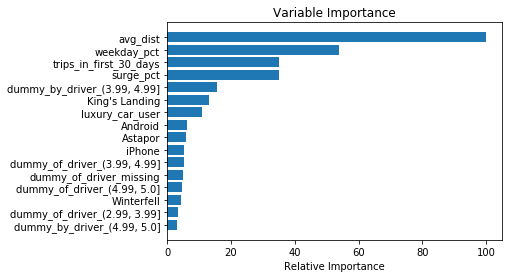

In [245]:
plot_importance(best_model, X_train, max_features=16)

In [246]:
def plot_loss(clf, params):
    '''Plot training deviance.  Stolen from sklearn documentation'''    
    # compute test set deviance
    test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        test_score[i] = clf.loss_(y_test, y_pred)

    plt.title('Deviance')
    plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
             label='Training Set Deviance')
    plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
             label='Test Set Deviance')
    plt.legend(loc='upper right')
    plt.xlabel('Boosting Iterations')
    plt.ylabel(clf.loss)

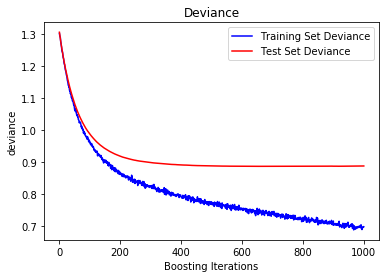

In [247]:
plot_loss(best_model, best_params)

[[5526  820]
 [1213 2441]]


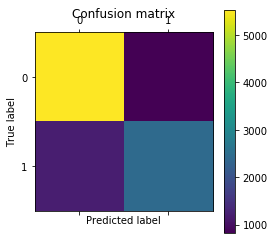

In [248]:
plot_confusion_matrix(best_model, X_test, y_test)
# Given enough time, it could be useful to check partial dependence plots, 
# especially to understand feature interactions.
# In addition, we could further refine feature engineering, such as binning.
# In conclusion, we might want to further tune learning_rate, n_estimators, max_depth, and
# min_samples_leaf because their optimal values are on the edge of the grid.

In [273]:
#Refine random forest model via grid search
rf_grid = {
    'max_depth': [8],
    'max_features': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'bootstrap': [True], # Mandatory with oob_score=True
    'n_estimators': [400],
    'random_state': [67],
    'oob_score': [True],
    'n_jobs': [-1]
    }

In [274]:
rf_grid_cv = GridSearchCV(RandomForestClassifier(),
                             rf_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='roc_auc')

In [275]:
rf_grid_cv.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   38.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'random_state': [67], 'n_jobs': [-1], 'bootstrap': [True], 'max_features': [None], 'min_samples_leaf': [2], 'max_depth': [8], 'oob_score': [True], 'n_estimators': [400], 'min_samples_split': [2]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc',
       verbose=True)

In [276]:
rf_grid_cv.best_params_

{'bootstrap': True,
 'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 400,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 67}

In [277]:
rf_grid_cv.best_score_

0.8488779044278235

In [278]:
best_model = rf_grid_cv.best_estimator_

In [279]:
best_model.oob_score_

0.78425

In [280]:
skm.roc_auc_score(y_test, best_model.predict(X_test))

0.7612947124504773

[[5456  890]
 [1232 2422]]


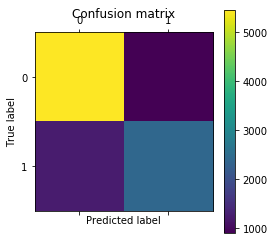

In [281]:
plot_confusion_matrix(best_model, X_test, y_test)

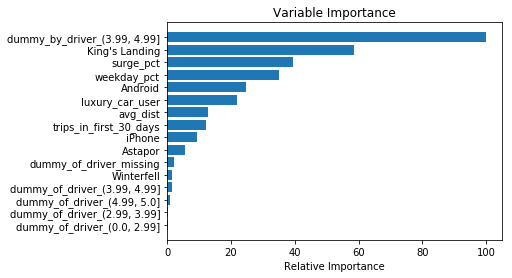

In [282]:
plot_importance(best_model, X_train, max_features=16)

In [283]:
m_oob = best_model.oob_decision_function_

In [285]:
#Check OOB error rate to see that random forest stabilized

# This code is hacked from sklearn documentation.

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 400
error_rate = []

from sklearn.base import clone

best_clf = RandomForestClassifier(bootstrap=True,
     max_depth=None, max_features='sqrt', min_samples_leaf=4,
     min_samples_split=2, n_estimators=400, n_jobs=-1,
     oob_score=True, random_state=67)

for ix in range(min_estimators, max_estimators + 1, 10):
    clf = clone(best_clf)
    clf.set_params(n_estimators=ix)
    clf.fit(X_train, y_train)

    # Record the OOB error for each `n_estimators=ix` setting.
    oob_error = 1 - clf.oob_score_
    error_rate.append((ix, oob_error))

/Users/chidam/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/chidam/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/chidam/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/chidam/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


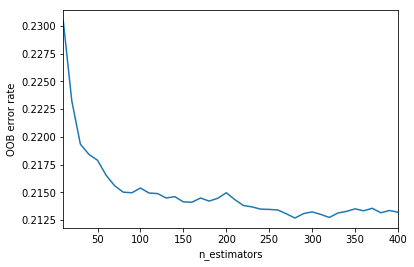

In [286]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
#Looks like OOB error rate has stabilizd around 250 or so estimators.
m_oob = np.array(error_rate)
plt.plot(m_oob[:,0], m_oob[:,1])
plt.xlim(min_estimators, max_estimators)
#plt.ylim(0, m_oob[:,1].max())
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")

In [ ]:
# Profit curves
# Should refine using data about costs of misclassification.
# Should talk to product manager to get relevant economic costs and benefits for retention.

In [ ]:
# Analysis should focus on the marginal consumer
# (the one indifferent between using the service and not)
# because these are the consumers we can most easily affect with incentives.